In [31]:
# import modules
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy.io import wavfile
import numpy as np
import math


#y, sr = librosa.load('Data/genres_original/rock/rock.00002.wav', duration=15.0)
y, sr = librosa.load('Data/genres_original/blues/blues.00047.wav', duration=15.0)

onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

# Or compute pulse with an alternate prior, like log-normal
prior = stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,
                                 prior=prior)
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

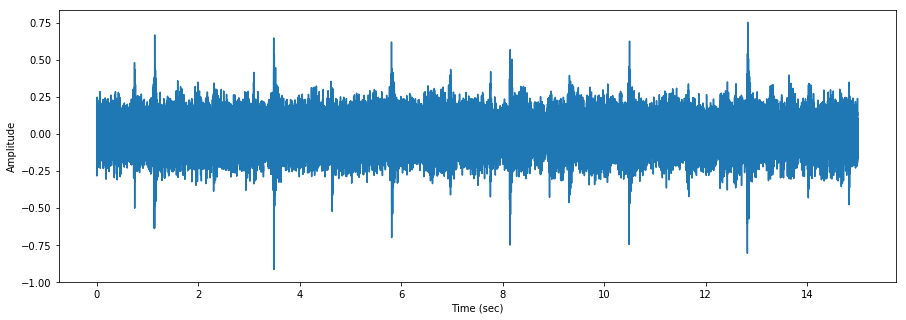

In [32]:
max_time = y.size/sr
time_steps = np.linspace(0, max_time, y.size)

plt.figure(figsize=(15,5))
plt.plot(time_steps, y)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.savefig('frame.svg', format='svg', dpi=1200)

[ 0.7662585   1.16099773  1.57895692  1.95047619  2.34521542  2.73995465
  3.11147392  3.50621315  3.87773243  4.27247166  4.66721088  5.08517007
  5.45668934  5.85142857  6.22294785  6.59446712  6.98920635  7.38394558
  7.77868481  8.17342404  8.56816327  8.93968254  9.33442177  9.729161
 10.12390023 10.51863946 10.89015873 11.261678   11.65641723 12.05115646
 12.46911565 12.86385488 13.2585941  13.65333333 14.07129252]
[ 0.  1.  1.  1.  2.  2.  3.  3.  3.  4.  4.  5.  5.  5.  6.  6.  6.  7.
  7.  8.  8.  8.  9.  9. 10. 10. 10. 11. 11. 12. 12. 12. 13. 13. 14.]
Time signature -> [3]


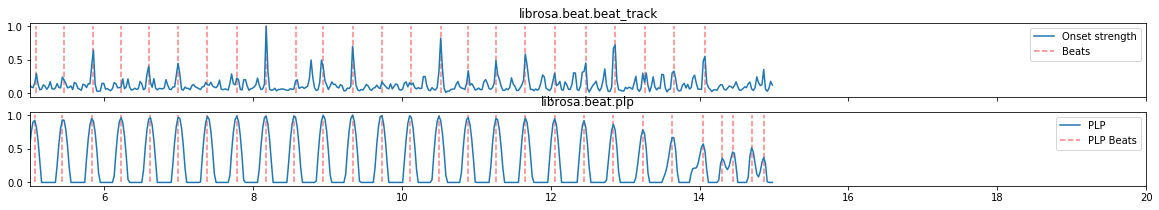

In [5]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

times = librosa.times_like(onset_env, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()

# Limit the plot to a 15-second window
times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),
         label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[5, 20])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())


print(times[beats])
#print(times[beats].size)
newArray = np.floor(times[beats])
print(newArray)
mode = stats.mode(newArray)
print(f"Time signature -> {mode.count}")

In [4]:
clicks = librosa.clicks(times[beats_plp], sr=sr, length=len(y))
ipd.Audio(y + clicks, rate=sr)

In [6]:
X = newArray
Y = np.transpose(X)

S = np.dot(Y, X)
print(S)

2213.0


In [3]:
y, sr = librosa.load('Data/genres_original/pop/pop.00002.wav', duration=30)
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)

[129.19921875]


In [5]:
prior = stats.uniform(30, 300)  # uniform over 30-300 BPM
utempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, prior=prior)
utempo

array([258.3984375])